# Data Loading, Storage and File Formats
## Problem Statement: Analyzing Sales Data from Multiple File Formats
## Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON)
Description: The goal is to load and analyze sales data from different file formats, including
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the
dataset.

Tasks to Perform:
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or
dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies,
missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing
duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure,
to enable seamless analysis.
Faculty of Science and Technology Savitribai Phule Pune University
Syllabus for Fourth Year of Artificial Intelligence and Data Science (2020 Course) 46/126
5. Perform data transformation tasks, such as merging multiple datasets, splitting
columns, or deriving new variables.
6. Analyze the sales data by performing descriptive statistics, aggregating data by
specific variables, or calculating metrics such as total sales, average order value, or
product category distribution.
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
data and gain insights into sales trends, customer behavior, or product performance.


In [1]:
import pandas as pd

# Create a sample sales dataset
data = {
    "OrderID": [101, 102, 103, 104, 105, 106, 107],
    "CustomerName": ["Alice Johnson", "Bob Smith", "Charlie Brown", "David Lee", "Eva Green", "Frank White", "Grace Kim"],
    "Category": ["Electronics", "Clothing", "Electronics", "Groceries", "Clothing", "Groceries", "Electronics"],
    "Product": ["Laptop", "T-Shirt", "Smartphone", "Apples", "Jeans", "Rice", "Headphones"],
    "Quantity": [1, 2, 1, 5, 1, 10, 2],
    "Price": [800, 20, 600, 2, 40, 1, 50]
}

# Convert to DataFrame
sales_df = pd.DataFrame(data)

# Save as CSV
sales_df.to_csv("sales.csv", index=False)

# Save as Excel
sales_df.to_excel("sales.xlsx", index=False)

# Save as JSON
sales_df.to_json("sales.json", orient="records", indent=4)

print("Sample sales.csv, sales.xlsx, and sales.json files created successfully!")

Sample sales.csv, sales.xlsx, and sales.json files created successfully!


### Sales Data Analysis
### Multiple File Formats: CSV, Excel, JSON

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load Files

In [3]:
# Load CSV
sales_csv = pd.read_csv("sales.csv")

# Load Excel
sales_excel = pd.read_excel("sales.xlsx")

# Load JSON
sales_json = pd.read_json("sales.json")

print("CSV Data Shape:", sales_csv.shape)
print("Excel Data Shape:", sales_excel.shape)
print("JSON Data Shape:", sales_json.shape)

CSV Data Shape: (7, 6)
Excel Data Shape: (7, 6)
JSON Data Shape: (7, 6)


### 2. Explore Data

In [4]:
print("\n--- CSV Data Info ---")
print(sales_csv.info())
print(sales_csv.head())

print("\n--- Excel Data Info ---")
print(sales_excel.info())
print(sales_excel.head())

print("\n--- JSON Data Info ---")
print(sales_json.info())
print(sales_json.head())


--- CSV Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       7 non-null      int64 
 1   CustomerName  7 non-null      object
 2   Category      7 non-null      object
 3   Product       7 non-null      object
 4   Quantity      7 non-null      int64 
 5   Price         7 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 468.0+ bytes
None
   OrderID   CustomerName     Category     Product  Quantity  Price
0      101  Alice Johnson  Electronics      Laptop         1    800
1      102      Bob Smith     Clothing     T-Shirt         2     20
2      103  Charlie Brown  Electronics  Smartphone         1    600
3      104      David Lee    Groceries      Apples         5      2
4      105      Eva Green     Clothing       Jeans         1     40

--- Excel Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex

### 3. Data Cleaning

In [5]:
# Concatenate all data (assuming same schema, otherwise normalize first)
sales_data = pd.concat([sales_csv, sales_excel, sales_json], ignore_index=True)

In [6]:
# Remove duplicates
sales_data.drop_duplicates(inplace=True)

In [7]:
# Handle missing values: fill numeric with median, categorical with mode
for col in sales_data.columns:
    if sales_data[col].dtype in ['int64', 'float64']:
        sales_data[col] = sales_data[col].fillna(sales_data[col].median())
    else:
        sales_data[col] = sales_data[col].fillna(sales_data[col].mode()[0])

print("\n--- Cleaned Data Info ---")
print(sales_data.info())


--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       7 non-null      int64 
 1   CustomerName  7 non-null      object
 2   Category      7 non-null      object
 3   Product       7 non-null      object
 4   Quantity      7 non-null      int64 
 5   Price         7 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 392.0+ bytes
None


### 4. Unified Format

In [8]:
# Already combined into one unified dataframe: sales_data
print("\nUnified Data Shape:", sales_data.shape)


Unified Data Shape: (7, 6)


### 5. Data Transformation

In [9]:
# Example: Splitting "Customer Name" into First and Last Name (if exists)
if "CustomerName" in sales_data.columns:
    sales_data[["FirstName", "LastName"]] = sales_data["CustomerName"].str.split(" ", n=1, expand=True)

In [10]:
# Example: Deriving new variable: Sales Amount = Quantity * Price
if "Quantity" in sales_data.columns and "Price" in sales_data.columns:
    sales_data["SalesAmount"] = sales_data["Quantity"] * sales_data["Price"]

### 6. Data Analysis

In [11]:
print("\n--- Descriptive Statistics ---")
print(sales_data.describe())


--- Descriptive Statistics ---
          OrderID   Quantity       Price  SalesAmount
count    7.000000   7.000000    7.000000     7.000000
mean   104.000000   3.142857  216.142857   228.571429
std      2.160247   3.338092  336.026005   328.553830
min    101.000000   1.000000    1.000000    10.000000
25%    102.500000   1.000000   11.000000    25.000000
50%    104.000000   2.000000   40.000000    40.000000
75%    105.500000   3.500000  325.000000   350.000000
max    107.000000  10.000000  800.000000   800.000000


In [12]:
# Total sales
if "SalesAmount" in sales_data.columns:
    total_sales = sales_data["SalesAmount"].sum()
    avg_order_value = sales_data["SalesAmount"].mean()
    print(f"\nTotal Sales: {total_sales}")
    print(f"Average Order Value: {avg_order_value}")


Total Sales: 1600
Average Order Value: 228.57142857142858


In [13]:
# Sales by Product Category
if "Category" in sales_data.columns:
    category_sales = sales_data.groupby("Category")["SalesAmount"].sum().sort_values(ascending=False)
    print("\nSales by Category:")
    print(category_sales)


Sales by Category:
Category
Electronics    1500
Clothing         80
Groceries        20
Name: SalesAmount, dtype: int64


### 7. Data Visualization

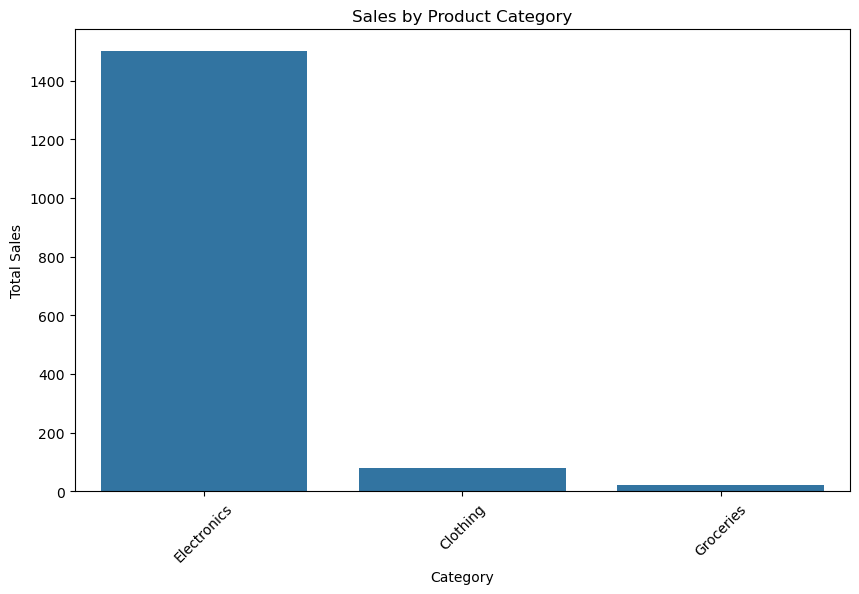

In [14]:
plt.figure(figsize=(10,6))
if "Category" in sales_data.columns:
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.title("Sales by Product Category")
    plt.ylabel("Total Sales")
    plt.xlabel("Category")
    plt.xticks(rotation=45)
    plt.show()

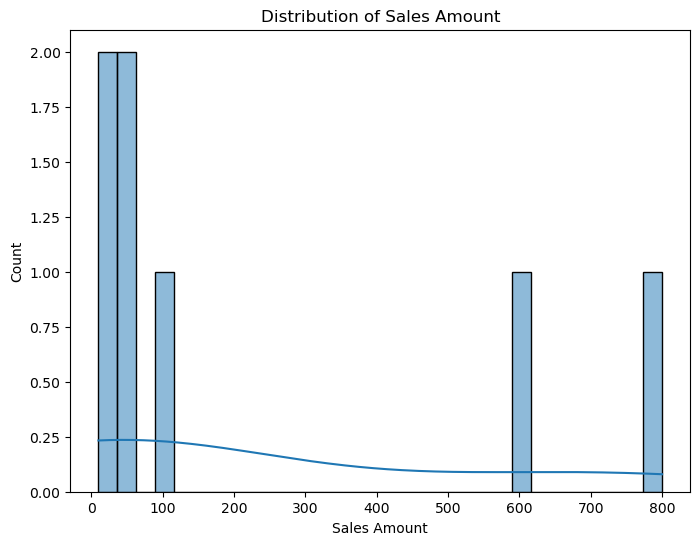

In [15]:
if "SalesAmount" in sales_data.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(sales_data["SalesAmount"], bins=30, kde=True)
    plt.title("Distribution of Sales Amount")
    plt.xlabel("Sales Amount")
    plt.show()

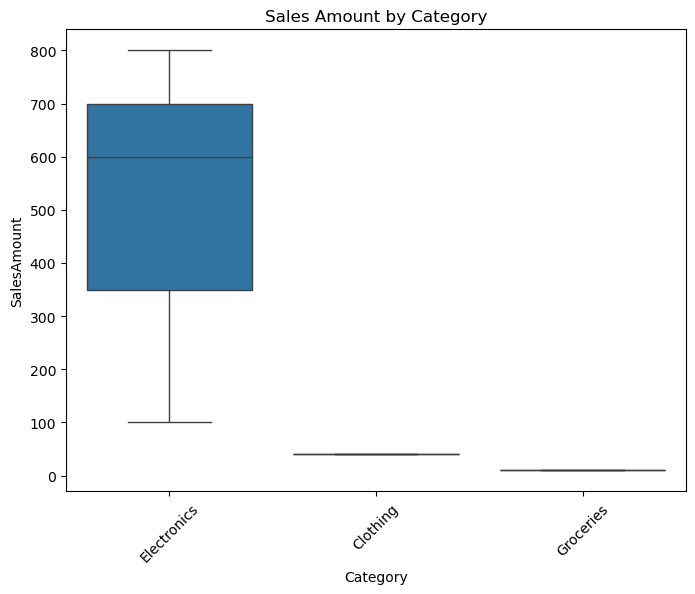

In [16]:
if "SalesAmount" in sales_data.columns and "Category" in sales_data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="Category", y="SalesAmount", data=sales_data)
    plt.title("Sales Amount by Category")
    plt.xticks(rotation=45)
    plt.show()

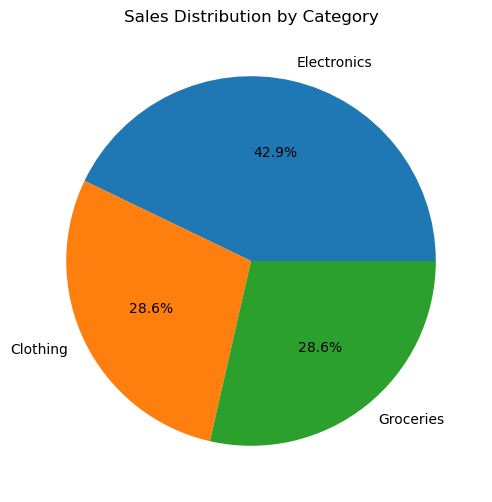

In [17]:
if "Category" in sales_data.columns:
    plt.figure(figsize=(6,6))
    sales_data["Category"].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title("Sales Distribution by Category")
    plt.ylabel("")
    plt.show()